# PART 1

In this exercise, im going to analyze England, Argentina and France's performance based on winning/losing in football using the results dataset for two different cases:
 1) Whether they are playing a friendly or official match
 2) Whether they are playing home or away. 
I will do this by getting the 95% confidence intervals and computing graphs and tables.
After figuruing it out, i will then try to analyze whether these 2 factors influence the three countries performance.

I chose these 3 countries since they are known for there strong football team so analyzing them would be interesting.

In [91]:
import pandas as pd
import numpy as np

In [39]:
df=pd.read_csv('results.csv')

I am going to add a new column that shows the result (win/lose/draw)

In [40]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [41]:
values= ['win','lose','draw']
df['result'] = np.select(conditions, values)

In [42]:
df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw


Now let's select three different popular countries and observe their probability for winning and losing in reponse to being away/home or playing an official/friendly matches

# ENGLAND

For England, lets observe their probability to win for both Friendly and Official matches:

In [43]:
eng=df[df['country']=='England']

In [44]:
eng.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,win
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,lose


I will filter the tournmanets into two sections either friendly matches or official matches:

In [45]:
conditions= [
    (eng['tournament']=='Friendly'),
    (eng['tournament']!='Friendly')
]

In [46]:
values=['Friendly','Official']

In [47]:
eng['typeofmatch'] = np.select(conditions, values)

C:\Users\user\AppData\Local\Temp/ipykernel_89840/234736558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['typeofmatch'] = np.select(conditions, values)


In [48]:
eng['typeofmatch'].value_counts()

Official    431
Friendly    286
Name: typeofmatch, dtype: int64

Now lets compare Confidence Intervals for England to win or lose in both friendly and official matches to know England's performance

In [49]:
x=pd.crosstab(eng['typeofmatch'],eng['result'],margins=True)
x

result,draw,lose,win,All
typeofmatch,,,,
Friendly,72,156,58,286
Official,84,259,88,431
All,156,415,146,717


In [50]:
x=np.array(x)
x

array([[ 72, 156,  58, 286],
       [ 84, 259,  88, 431],
       [156, 415, 146, 717]], dtype=int64)

Confidence Interval for England to win in friendly matches:

In [58]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [52]:
CI_engwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_friendly
                          

(0.15619778812633506, 0.24939661746807051)

Confidence Interval for England to win in official matches:

In [53]:
CI_engwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_official

(0.1661205581281346, 0.24223211008532247)

Confidence Interval to win in friendly matches against win in official matches for England

In [54]:
ci_engwin = {}
ci_engwin['typeofmatch'] = ['Friendly','Official']
ci_engwin['lb'] = [CI_engwin_friendly[0],CI_engwin_official[0]]
ci_engwin['ub'] = [CI_engwin_friendly[1],CI_engwin_official[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,typeofmatch,lb,ub
0,Friendly,0.156198,0.249397
1,Official,0.166121,0.242232


([<matplotlib.axis.YTick at 0x23f83722be0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

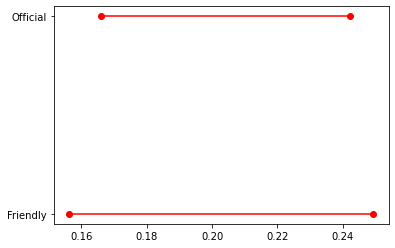

In [55]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['typeofmatch']))

We can see from the graph above that confidence level interval for both friendly and official are very similar with no big difference which indicates that England's performance to win is not really affected by the type of tournament.

Now for England, lets observe their probability to lose for both Friendly and Official matches:

Confidence Interval for England to lose in friendly matches:

In [56]:
CI_englose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_englose_friendly

(0.48774694494485304, 0.6031621459642378)

Confidence Interval for England to lose in official matches:

In [57]:
CI_englose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_englose_official

(0.5546956899682828, 0.6471604585235965)

Confidence Interval to lose in friendly matches against lose in official matches for England:

In [58]:
ci_englose = {}
ci_englose['typeofmatch'] = ['Friendly','Official']
ci_englose['lb'] = [CI_englose_friendly[0],CI_engwin_official[0]]
ci_englose['ub'] = [CI_englose_friendly[1],CI_engwin_official[1]]
df_ci= pd.DataFrame(ci_englose)
df_ci

,typeofmatch,lb,ub
0,Friendly,0.487747,0.603162
1,Official,0.166121,0.242232


([<matplotlib.axis.YTick at 0x23f837816a0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

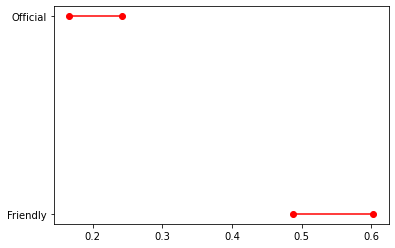

In [59]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['typeofmatch']))

We can see from the graph above that confidence level intervals for both friendly and official are very similar with only a slight difference which indicates that England's performance to lose is not really affected by the type of tournament.

Now lets compare the probability of winning/losing between home matches and away matches for England. This would give a picture on whether the fans have an impact or not

For England to win away/home:

In [60]:
eng['home']=(eng['home_team']=='England')

C:\Users\user\AppData\Local\Temp/ipykernel_89840/4164357470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['home']=(eng['home_team']=='England')


In [61]:
eng['home'].value_counts()

True     464
False    253
Name: home, dtype: int64

In [62]:
x=pd.crosstab(eng['home'],eng['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,55,115,83,253
True,101,300,63,464
All,156,415,146,717


In [63]:
eng.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typeofmatch,home
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose,Friendly,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw,Friendly,True
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,win,Friendly,True
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,lose,Friendly,True


In [64]:
x=np.array(x)
x

array([[ 55, 115,  83, 253],
       [101, 300,  63, 464],
       [156, 415, 146, 717]], dtype=int64)

Confidence Interval for England to win at home:

In [66]:
CI_engwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_home

(0.10460752863595074, 0.1669441955019803)

Confidence Interval for England to win away:

In [69]:
CI_engwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_away

(0.27020958414722984, 0.3859168980662089)

Confidence Interval to win at home against win away for England:

In [70]:
ci_engwin = {}
ci_engwin['home'] = ['Yes','No']
ci_engwin['lb'] = [CI_engwin_home[0],CI_engwin_away[0]]
ci_engwin['ub'] = [CI_engwin_home[1],CI_engwin_away[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,home,lb,ub
0,Yes,0.104608,0.166944
1,No,0.270210,0.385917


([<matplotlib.axis.YTick at 0x1dc4485ca30>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

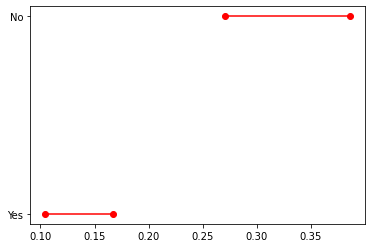

In [71]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

We can tell that there is a difference in England's performance when they play at home or away because the graph shows a difference in confidence level intervals, indicating that England playing at home or away affects their winning. (More likely to win at home)

For England to lose away/home:

Confidence Interval for England to lose at home:

In [65]:
CI_englose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_englose_home

(0.6030552883111224, 0.6900481599647397)

Confidence Interval for England to lose away:

In [67]:
CI_englose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_englose_away

(0.3931896334222213, 0.5159012756686878)

Confidence Interval to lose at home against lose away for England:

In [68]:
ci_englose = {}
ci_englose['home'] = ['Yes','No']
ci_englose['lb'] = [CI_englose_home[0],CI_englose_away[0]]
ci_englose['ub'] = [CI_englose_home[1],CI_englose_away[1]]
df_ci= pd.DataFrame(ci_englose)
df_ci

,home,lb,ub
0,Yes,0.603055,0.690048
1,No,0.393190,0.515901


([<matplotlib.axis.YTick at 0x23f837dfe50>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

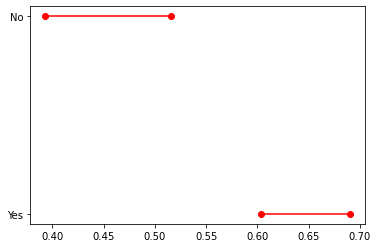

In [69]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

We can tell that there is a difference in England's performance when they play at home or away because the graph shows a difference in confidence level intervals, indicating that England playing at home or away affects their losing.(More likely to lose away)

# ARGENTINA

For Argentina, lets observe their probability to win in both Friendly and Official matches:

In [70]:
arg=df[df['country']=='Argentina']

In [71]:
arg.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
155,9/13/1903,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,win
177,8/15/1905,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,draw
190,10/21/1906,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,lose
226,9/13/1908,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,lose


In [72]:
conditions= [
    (arg['tournament']=='Friendly'),
    (arg['tournament']!='Friendly')
]
values=['Friendly','Official']

In [73]:
arg['typeofmatch'] = np.select(conditions, values)

C:\Users\user\AppData\Local\Temp/ipykernel_89840/4205310655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arg['typeofmatch'] = np.select(conditions, values)


In [74]:
arg['typeofmatch'].value_counts()

Official    321
Friendly    135
Name: typeofmatch, dtype: int64

Now lets compare Confidence Intervals for Argentina to win in both friendly and official matches to know Argentina's performance

In [75]:
y=pd.crosstab(arg['typeofmatch'],arg['result'],margins=True)
y

result,draw,lose,win,All
typeofmatch,,,,
Friendly,35,89,11,135
Official,77,185,59,321
All,112,274,70,456


In [76]:
y=np.array(y)
y

array([[ 35,  89,  11, 135],
       [ 77, 185,  59, 321],
       [112, 274,  70, 456]], dtype=int64)

Confidence Interval for Argentina to win in friendly matches:

In [77]:
CI_argwin_friendly=proportion_confint(count=y[0,2],nobs=y[0,3],alpha=(1-.95))
CI_argwin_friendly

(0.03533329664452295, 0.12762966631844003)

Confidence Interval for Argentina to win in official matches:

In [84]:
CI_argwin_official=proportion_confint(count=y[1,2],nobs=y[1,3],alpha=(1-.95))
CI_argwin_official

(0.14142977135142917, 0.22617147475448982)

Confidence Interval to win in friendly matches against win in official matches for Argentina

In [122]:
ci_argwin = {}
ci_argwin['typeofmatch'] = ['Friendly','Official']
ci_argwin['lb'] = [CI_argwin_friendly[0],CI_argwin_official[0]]
ci_argwin['ub'] = [CI_argwin_friendly[1],CI_argwin_official[1]]
df_ci= pd.DataFrame(ci_argwin)
df_ci

,typeofmatch,lb,ub
0,Friendly,0.035333,0.127630
1,Official,0.141430,0.226171


([<matplotlib.axis.YTick at 0x1dc45b2d430>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

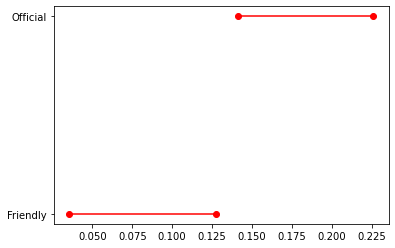

In [123]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['typeofmatch']))

We can see from the graph above that there is no observable difference in confidence level interval when it comes to friendly/official matches for Argentina which indicates that Argentina's performance is not really affected by the type of tournament

Now for Argentina, lets observe their probability to lose in both Friendly and Official matches:

Confidence Interval for Argentina to lose in friendly matches:

In [78]:
CI_arglose_friendly=proportion_confint(count=y[0,1],nobs=y[0,3],alpha=(1-.95))
CI_arglose_friendly

(0.5793087273506131, 0.7392097911679053)

Confidence Interval for Argentina to lose in official matches:

In [79]:
CI_arglose_official=proportion_confint(count=y[1,1],nobs=y[1,3],alpha=(1-.95))
CI_arglose_official

(0.5222677442170198, 0.6303802308608617)

Confidence Interval to lose in friendly matches against lose in official matches for Argentina:

In [80]:
ci_arglose = {}
ci_arglose['typeofmatch'] = ['Friendly','Official']
ci_arglose['lb'] = [CI_arglose_friendly[0],CI_arglose_official[0]]
ci_arglose['ub'] = [CI_arglose_friendly[1],CI_arglose_official[1]]
df_ci= pd.DataFrame(ci_arglose)
df_ci

,typeofmatch,lb,ub
0,Friendly,0.579309,0.73921
1,Official,0.522268,0.63038


([<matplotlib.axis.YTick at 0x23f83853df0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

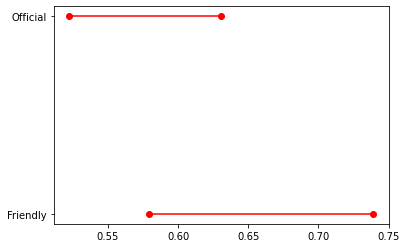

In [81]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['typeofmatch']))

We can see from the graph above that there is only a slight difference in confidence levelinterval when it comes to friendly/official matches for Argentina which indicates that Argentina's performance is slightly affected by the type of tournament.

Now lets compare the probability of winning/losing between home matches and away matches for Argentina. This would give a picture on whether the fans have an impact or not

For Argentina to win away/home:

In [82]:
arg['home']=(arg['home_team']=='Argentina')

C:\Users\user\AppData\Local\Temp/ipykernel_89840/1159516524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arg['home']=(arg['home_team']=='Argentina')


In [83]:
arg['home'].value_counts()

True     340
False    116
Name: home, dtype: int64

In [84]:
y=pd.crosstab(arg['home'],arg['result'],margins=True)
y

result,draw,lose,win,All
home,,,,
False,27,50,39,116
True,85,224,31,340
All,112,274,70,456


In [85]:
arg.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typeofmatch,home
155,9/13/1903,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,win,Friendly,True
177,8/15/1905,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,draw,Official,True
190,10/21/1906,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,lose,Official,True
226,9/13/1908,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,lose,Official,True


In [86]:
y=np.array(y)
y

array([[ 27,  50,  39, 116],
       [ 85, 224,  31, 340],
       [112, 274,  70, 456]], dtype=int64)

Confidence Interval for Argentine to win at home:

In [92]:
CI_argwin_home=proportion_confint(count=y[1,2],nobs=y[1,3],alpha=(1-.95))
CI_argwin_home

(0.060578698733660494, 0.12177424244281009)

Confidence Interval for Argentine to win away:

In [93]:
CI_argwin_away=proportion_confint(count=y[0,2],nobs=y[0,3],alpha=(1-.95))
CI_argwin_away

(0.25023851054020474, 0.42217528256324355)

In [94]:
ci_argwin = {}
ci_argwin['home'] = ['Yes','No']
ci_argwin['lb'] = [CI_argwin_home[0],CI_argwin_away[0]]
ci_argwin['ub'] = [CI_argwin_home[1],CI_argwin_away[1]]
df_ci= pd.DataFrame(ci_argwin)
df_ci

,home,lb,ub
0,Yes,0.060579,0.121774
1,No,0.250239,0.422175


([<matplotlib.axis.YTick at 0x1dc44990d00>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

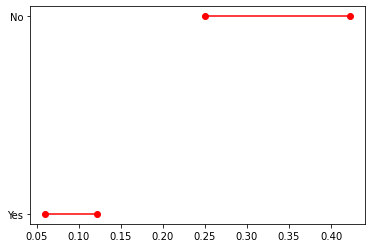

In [96]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

We can tell that there is a significant difference when it comes to playing home or away for Argentina on their performance since the graph shows a difference in confidence level intervals, this indicates that Argentina playing home/away affects their winning. (More likely to win at home)

We can see from the graph above that there is a significant difference in confidence level when it comes to playing home/away for Argentina

For Argentina to lose at home:

In [88]:
CI_arglose_home=proportion_confint(count=y[1,1],nobs=y[1,3],alpha=(1-.95))
CI_arglose_home

(0.6084290783071029, 0.7092179805164265)

For Argentina to lose away:

In [89]:
CI_arglose_away=proportion_confint(count=y[0,1],nobs=y[0,3],alpha=(1-.95))
CI_arglose_away

(0.34091512726528816, 0.5211538382519532)

In [90]:
ci_arglose = {}
ci_arglose['home'] = ['Yes','No']
ci_arglose['lb'] = [CI_arglose_home[0],CI_arglose_away[0]]
ci_arglose['ub'] = [CI_arglose_home[1],CI_arglose_away[1]]
df_ci= pd.DataFrame(ci_arglose)
df_ci

,home,lb,ub
0,Yes,0.608429,0.709218
1,No,0.340915,0.521154


([<matplotlib.axis.YTick at 0x23f838b1c10>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

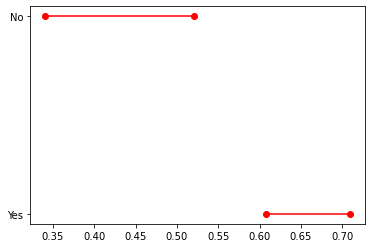

In [91]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

We can tell that there is a significant difference when it comes to playing home or away for Argentina on their performance since the graph shows a difference in confidence level intervals, this indicates that Argentina playing home/away affects their losing. (More likely to lose away)

# FRANCE

For France, lets observe their probability to win in both Friendly and Official matches:

In [92]:
fra=df[df['country']=='France']

In [93]:
conditions= [
    (fra['tournament']=='Friendly'),
    (fra['tournament']!='Friendly')
]
values=['Friendly','Official']

In [94]:
fra['typeofmatch'] = np.select(conditions, values)

C:\Users\user\AppData\Local\Temp/ipykernel_89840/3505533578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fra['typeofmatch'] = np.select(conditions, values)


In [95]:
fra['typeofmatch'].value_counts()

Friendly    471
Official    347
Name: typeofmatch, dtype: int64

Now lets compare Confidence Intervals for France to win or lose in both friendly and official matches to know France's performance

In [96]:
z=pd.crosstab(fra['typeofmatch'],fra['result'],margins=True)
z

result,draw,lose,win,All
typeofmatch,,,,
Friendly,112,228,131,471
Official,77,189,81,347
All,189,417,212,818


In [99]:
z=np.array(z)
z

array([[112, 228, 131, 471],
       [ 77, 189,  81, 347],
       [189, 417, 212, 818]], dtype=int64)

Confidence Interval for France to win in friendly matches:

In [100]:
CI_frawin_friendly=proportion_confint(count=z[0,2],nobs=z[0,3],alpha=(1-.95))
CI_frawin_friendly

(0.2376654895121334, 0.3185977801269324)

Confidence Interval for France to win in official matches:

In [101]:
CI_frawin_official=proportion_confint(count=z[1,2],nobs=z[1,3],alpha=(1-.95))
CI_frawin_official

(0.18892148425887595, 0.27793730536648426)

Confidence interval to win in friendly matches against win in official matches for France:

In [102]:
ci_frawin = {}
ci_frawin['typeofmatch'] = ['Friendly','Official']
ci_frawin['lb'] = [CI_frawin_friendly[0],CI_frawin_official[0]]
ci_frawin['ub'] = [CI_frawin_friendly[1],CI_frawin_official[1]]
df_ci= pd.DataFrame(ci_frawin)
df_ci

,typeofmatch,lb,ub
0,Friendly,0.237665,0.318598
1,Official,0.188921,0.277937


([<matplotlib.axis.YTick at 0x23f87712ee0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

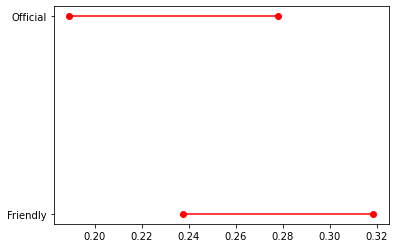

In [103]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['typeofmatch']))

We can see from the graph above that there is only a slight difference in confidence level interval when it comes to friendly/official matches for France which indicates that France's performance is not really affected by the type of tournament

Now for France, lets observe their probability to lose in both Friendly and Official matches:

Confidence Interval for France to win in friendly matches:

In [104]:
CI_fralose_friendly=proportion_confint(count=z[0,1],nobs=x[0,3],alpha=(1-.95))
CI_fralose_friendly

(0.8644148303341544, 0.9379567111678219)

Confidence Interval for France to lose in official matches:

In [105]:
CI_fralose_official=proportion_confint(count=z[1,1],nobs=z[1,3],alpha=(1-.95))
CI_fralose_official

(0.4922707551354989, 0.5970664206570083)

In [106]:
ci_fralose = {}
ci_fralose['typeofmatch'] = ['Friendly','Official']
ci_fralose['lb'] = [CI_fralose_friendly[0],CI_fralose_official[0]]
ci_fralose['ub'] = [CI_fralose_friendly[1],CI_fralose_official[1]]
df_ci= pd.DataFrame(ci_fralose)
df_ci

,typeofmatch,lb,ub
0,Friendly,0.864415,0.937957
1,Official,0.492271,0.597066


([<matplotlib.axis.YTick at 0x23f877730a0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

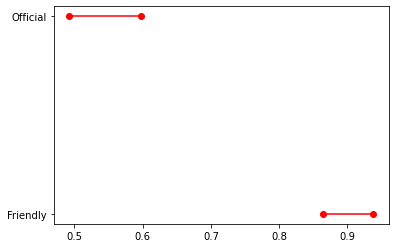

In [107]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['typeofmatch']))

We can see from the graph above that there is a slight difference in confidence level interval when it comes to friendly/official matches for France which indicates that France's performance is slightly affected by the type of tournament. 

Now lets compare the probability of winning/losing between home matches and away matches for France. This would give a picture on whether the fans have an impact or not

For France to win home/away:

In [108]:
fra['home']=(fra['home_team']=='France')

C:\Users\user\AppData\Local\Temp/ipykernel_89840/1181979322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fra['home']=(fra['home_team']=='France')


In [109]:
fra['home'].value_counts()

True     443
False    375
Name: home, dtype: int64

In [110]:
z=pd.crosstab(fra['home'],fra['result'],margins=True)
z

result,draw,lose,win,All
home,,,,
False,100,157,118,375
True,89,260,94,443
All,189,417,212,818


In [111]:
z=np.array(z)
z

array([[100, 157, 118, 375],
       [ 89, 260,  94, 443],
       [189, 417, 212, 818]], dtype=int64)

Confidence Interval for France to win at home

In [112]:
CI_frawin_home=proportion_confint(count=z[1,2],nobs=z[1,3],alpha=(1-.95))
CI_frawin_home

(0.17411643713822142, 0.2502627953674219)

Confidence Interval for France to win away:

In [113]:
CI_frawin_away=proportion_confint(count=z[0,2],nobs=z[0,3],alpha=(1-.95))
CI_frawin_away

(0.2676654873825878, 0.3616678459507455)

In [114]:
ci_frawin = {}
ci_frawin['home'] = ['Yes','No']
ci_frawin['lb'] = [CI_frawin_home[0],CI_frawin_away[0]]
ci_frawin['ub'] = [CI_frawin_home[1],CI_frawin_away[1]]
df_ci= pd.DataFrame(ci_frawin)
df_ci

,home,lb,ub
0,Yes,0.174116,0.250263
1,No,0.267665,0.361668


([<matplotlib.axis.YTick at 0x23f877ceb80>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

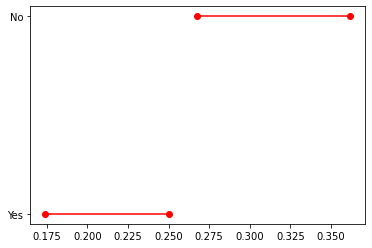

In [115]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

We can see from the graph above that there is no difference in confidence level interval when it comes to away/at home matches for France which indicates that France's performance to win is not really affected by the place they are playing in

In [150]:
stats2=df.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
stats2

ddeaths                                         
               mean         std   size  get_ci_lb  get_ci_ub
weekdays                                                    
Fri       86.371606  273.598459   9798  80.953511  91.789702
Sat       77.663133  241.216633   9057  72.694680  82.631587
Sun       61.396673  188.673061   9078  57.514984  65.278363
Mon       68.080364  203.627426   9768  64.041722  72.119006
Tue       88.926919  299.738615  10030  83.060235  94.793604
Wed       89.443762  292.661979  10091  83.732930  95.154594
Thu       87.884836  293.387765   9951  82.119700  93.649972

For France to lose home/away:

Confidence Interval for France to lose at home:

In [116]:
CI_fralose_home=proportion_confint(count=z[1,1],nobs=z[1,3],alpha=(1-.95))
CI_fralose_home

(0.541055825404375, 0.6327590730154896)

Confidence Interval for France to lose away:

In [117]:
CI_fralose_away=proportion_confint(count=z[0,1],nobs=z[0,3],alpha=(1-.95))
CI_fralose_away

(0.36873463210645324, 0.46859870122688013)

In [118]:
ci_fralose = {}
ci_fralose['home'] = ['Yes','No']
ci_fralose['lb'] = [CI_fralose_home[0],CI_fralose_away[0]]
ci_fralose['ub'] = [CI_fralose_home[1],CI_fralose_away[1]]
df_ci= pd.DataFrame(ci_fralose)
df_ci

,home,lb,ub
0,Yes,0.541056,0.632759
1,No,0.368735,0.468599


([<matplotlib.axis.YTick at 0x23f87831220>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

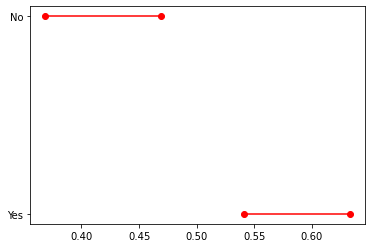

In [119]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

We can see from the graph above that there is no difference in confidence level interval when it comes to away/at home matches for France which indicates that France's performance to lose is not really affected by the place they are playing in

I used these codes to find the confidence interval of 95% to win/lose for friendly/official matches. We can conclude that Argentina's performance is the most affected when playing home/away than England and France. This indicates that the fans of Argentina are the most effective in terms of influencing Argentina. However, for friendly and official matches, the three countries seem to only show a slight difference in performance.

# Part 2

In [21]:
import pandas as pd
from scipy.stats import t

In [15]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [16]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [17]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [18]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [19]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

I will now compute a new column that describes the year 

In [25]:
df['date'][0]
df['date'] = pd. to_datetime(df['date'],format='%Y-%m-%d')
df['date'][0]
df['year'] = pd. DatetimeIndex(df['date']). year
df['year'][0]

2020

The daily reported number of confirmed cases for 2020 and 2021:

Daily reported number of cases for 2020 only:

In [28]:
only2020=df[(df['year']==2020)]
only2020

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
122473,2020-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,114,8,14645468,Sun,Dec,2020
122474,2020-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,71,5,14645468,Mon,Dec,2020
122475,2020-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,177,5,14645468,Tue,Dec,2020
122476,2020-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,300,1,14645468,Wed,Dec,2020


In [30]:
stats=only2020.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
stats

dcases                                              
                 mean           std  size    get_ci_lb    get_ci_ub
weekdays                                                           
Fri       1632.492349   8833.258224  7777  1436.142500  1828.842199
Sat       1484.606896   8365.079408  7802  1298.962188  1670.251604
Sun       1264.748243   7002.554530  7825  1109.570437  1419.926049
Mon       1348.117834   7587.531011  7850  1180.244886  1515.990783
Tue       1522.476753   8405.377158  7872  1336.769211  1708.184295
Wed       1628.149760   8764.926602  7906  1434.915347  1821.384172
Thu       1794.651148  13084.251453  7926  1506.555782  2082.746514

Daily deaths for 2020:

In [31]:
stats2=only2020.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
stats2

ddeaths                                        
               mean         std  size  get_ci_lb  get_ci_ub
weekdays                                                   
Fri       36.808409  155.385910  7777  33.354418  40.262401
Sat       31.776980  135.878165  7802  28.761460  34.792500
Sun       25.168179  101.624503  7825  22.916163  27.420195
Mon       29.045096  125.280366  7850  26.273287  31.816904
Tue       39.274644  173.014911  7872  35.452071  43.097218
Wed       39.768657  176.608073  7906  35.875098  43.662216
Thu       37.976911  168.376400  7926  34.269519  41.684304

Daily reported number of cases for 2021 only:

In [32]:
only2021=df[(df['year']==2021)]
only2021

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
312,2021-01-01,AFG,Afghanistan,Low income,South Asia,Asia,183,12,38041754,Fri,Jan,2021
313,2021-01-02,AFG,Afghanistan,Low income,South Asia,Asia,73,10,38041754,Sat,Jan,2021
314,2021-01-03,AFG,Afghanistan,Low income,South Asia,Asia,123,10,38041754,Sun,Jan,2021
315,2021-01-04,AFG,Afghanistan,Low income,South Asia,Asia,200,9,38041754,Mon,Jan,2021
316,2021-01-05,AFG,Afghanistan,Low income,South Asia,Asia,102,7,38041754,Tue,Jan,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,2021
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021


In [33]:
stats3=only2021.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
stats3

dcases                                              
                 mean           std  size    get_ci_lb    get_ci_ub
weekdays                                                           
Fri       3440.657502  16406.696355  9857  3116.728234  3764.586770
Sat       2730.757187  12586.632218  9670  2479.858283  2981.656091
Sun       2327.773550  11187.860868  9671  2104.768951  2550.778148
Mon       2740.382484  14157.064061  9671  2458.193563  3022.571405
Tue       3093.372105  13860.314027  9672  2817.112508  3369.631702
Wed       3398.018300  15357.083251  9672  3091.925551  3704.111050
Thu       3430.404880  15727.925287  9672  3116.920619  3743.889141

Daily deaths for 2021:

In [34]:
stats4=only2021.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
stats4

ddeaths                                        
               mean         std  size  get_ci_lb  get_ci_ub
weekdays                                                   
Fri       56.813432  241.821657  9857  52.038972  61.587892
Sat       47.101448  205.467441  9670  43.005709  51.197186
Sun       37.267914  163.388173  9671  34.011142  40.524687
Mon       45.187157  176.339137  9671  41.672237  48.702078
Tue       60.252998  268.554510  9672  54.900251  65.605746
Wed       60.811208  259.274823  9672  55.643420  65.978995
Thu       59.298697  261.870322  9672  54.079177  64.518218

Now let's compute ratio between deaths and confirmed cases for 2020:

In [35]:
only2020=df[(df['year']==2020)]

In [36]:
x=only2020['dcases'].sum()
x

83839670

In [37]:
y=only2020['ddeaths'].sum()
y

1883714

In [38]:
ratio2020= y/x
ratio2020

0.022468051222052757

Now let's compute ratio between deaths and confirmed cases for 2021:

In [39]:
only2021=df[(df['year']==2021)]

In [40]:
z=only2021['dcases'].sum()
z

205298724

In [41]:
a=only2021['ddeaths'].sum()
a

3557374

In [42]:
ratio2021= a/z
ratio2021

0.017327794010059214

We can conclude that ratio for 2021 decreased from 2020 which means that either the number of cases increased or number of deaths increased.

Now let's Compare between 2020 and 2021 in terms of several factors like regions,
income, and continents

In [117]:
ratio=df['dcases']/df['ddeaths']
df['ratio']=ratio
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year,ratio
28,2020-03-23,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Mon,Mar,2020,6.000000
31,2020-03-26,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Thu,Mar,2020,6.000000
34,2020-03-29,AFG,Afghanistan,Low income,South Asia,Asia,8,2,38041754,Sun,Mar,2020,4.000000
39,2020-04-03,AFG,Afghanistan,Low income,South Asia,Asia,34,1,38041754,Fri,Apr,2020,34.000000
41,2020-04-05,AFG,Afghanistan,Low income,South Asia,Asia,29,2,38041754,Sun,Apr,2020,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122837,2021-12-26,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,605,6,14645468,Sun,Dec,2021,100.833333
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021,64.588235
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021,65.593750
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021,73.333333


In [139]:
from scipy.stats import t

# According to continent:

In [183]:
df2=df.groupby(['continent','year']).agg({"ratio": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
df2=df2.reset_index()
df2= pd.DataFrame(df2)
df2

continent  year       ratio                                 \
                                          mean         std   size   get_ci_lb   
0                     Africa  2020   52.623736   62.672790   4892   50.867061   
1                     Africa  2021   75.063308  206.868302   8449   70.651652   
2                       Asia  2020  106.957897  157.389473   7393  103.369632   
3                       Asia  2021  126.452824  195.776606  12025  122.953291   
4                     Europe  2020   85.172982  158.693265   8597   81.817969   
5                     Europe  2021  165.387291  524.748437  11756  155.900613   
6   North America(continent)  2020   58.520703   84.557767   2924   55.454557   
7   North America(continent)  2021   85.684798  126.416057   4606   82.033036   
8                    Oceania  2020   39.919436   69.552255    170   29.388766   
9                    Oceania  2021  194.977007  366.457359    381  158.062720   
10  South America(continent)  2020   46.966987   56.138845   2644   44.826169   
11  South America(continent)  2021   60.432168   92.791185   3936   57.532416   

                
     get_ci_ub  
0    54.380410  
1    79.474964  
2   110.546162  
3   129.952357  
4    88.527996  
5   174.873970  
6    61.586848  
7    89.336561  
8    50.450106  
9   231.891293  
10   49.107805  
11   63.331920

Now let's create two graphs for ratio according to continent in 2020 and 2021:

In [190]:
co20=df2[(df2['year']==2020)]
co21=df2[(df2['year']==2021)]
co20.columns
co20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
co21.columns
co21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Continents in 2020')

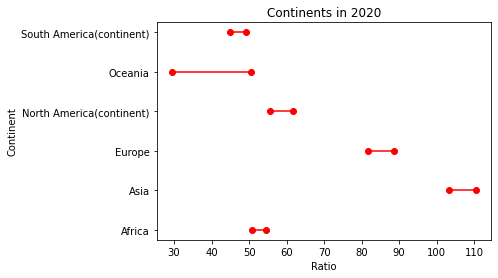

In [191]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(co20['get_ci_lb'],co20['get_ci_ub'],range(len(df2))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(co20)),list(df20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents in 2020")

Text(0.5, 1.0, 'Continents in 2021')

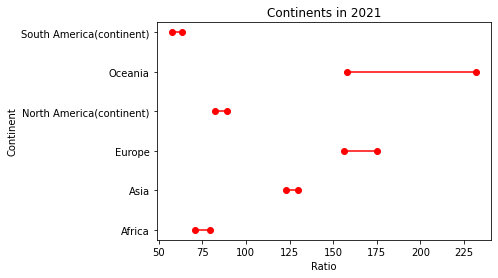

In [192]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(co21['get_ci_lb'],co21['get_ci_ub'],range(len(df2))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(co21)),list(co21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents in 2021")

By comparing both graphs we can say that Oceania showed the most difference in ratio of deaths/reported cases from 2020 to 2021

# According to region:

In [184]:
df3=df.groupby(['region','year']).agg({"ratio": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
df3=df3.reset_index()
df3= pd.DataFrame(df3)
df3

region  year       ratio                     \
                                            mean         std   size   
0          East Asia & Pacific  2020   83.567307  154.946570   1798   
1          East Asia & Pacific  2021  158.944043  266.651870   3834   
2        Europe & Central Asia  2020   85.533757  155.144980   9958   
3        Europe & Central Asia  2021  154.876803  485.184235  13977   
4    Latin America & Caribbean  2020   51.769371   74.371591   4970   
5    Latin America & Caribbean  2021   68.812508  106.545737   7815   
6   Middle East & North Africa  2020  110.395171  162.071844   4225   
7   Middle East & North Africa  2021  117.932518  181.088283   5980   
8        North America(region)  2020   63.547620   55.760176    598   
9        North America(region)  2021  130.337613  155.721731    727   
10                  South Asia  2020   84.544853   93.638844   1375   
11                  South Asia  2021   73.658405   80.526434   2161   
12          Sub-Saharan Africa  2020   54.795871   67.315740   3696   
13          Sub-Saharan Africa  2021   80.322500  227.180471   6659   

                            
     get_ci_lb   get_ci_ub  
0    76.400465   90.734149  
1   150.500906  167.387180  
2    82.486195   88.581319  
3   146.832556  162.921050  
4    49.701217   53.837524  
5    66.449926   71.175090  
6   105.506770  115.283571  
7   113.341851  122.523185  
8    59.069425   68.025815  
9   118.999136  141.676090  
10   79.591086   89.498619  
11   70.261350   77.055460  
12   52.624965   56.966777  
13   74.865002   85.779997

Now let's create two graphs for ratio according to region in 2020 and 2021:

In [194]:
re20=df3[(df3['year']==2020)]
re21=df3[(df3['year']==2021)]

re20.columns
re20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
re21.columns
re21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Regions in 2020')

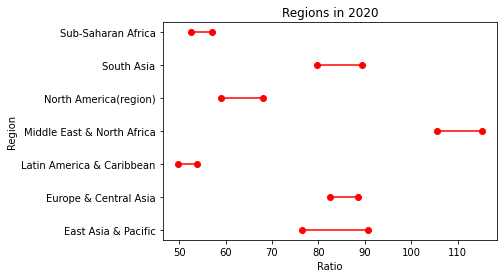

In [195]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(re20['get_ci_lb'],re20['get_ci_ub'],range(len(re20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(re20)),list(re20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions in 2020")

Text(0.5, 1.0, 'Regions in 2021')

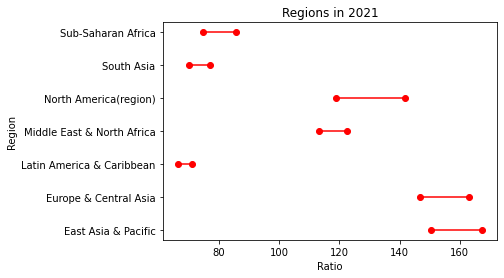

In [196]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(re21['get_ci_lb'],re21['get_ci_ub'],range(len(re21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(re21)),list(re21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions in 2021")

By comparing both graphs we can say that Sub-Saharan Africa showed the least difference in ratio of deaths/reported cases from 2020 to 2021

# According to Income:

In [186]:
df4=df.groupby(['income','year']).agg({"ratio": [np.mean, np.std, np.size, get_ci_lb, get_ci_ub]})
df4=df4.reset_index()
df4= pd.DataFrame(df4)
df4

income  year       ratio                                 \
                                    mean         std   size   get_ci_lb   
0          High income  2020  110.071092  184.041271   9477  106.365280   
1          High income  2021  198.575163  510.705591  13416  189.932524   
2           Low income  2020   51.368931   75.219109   2388   48.350513   
3           Low income  2021   55.006252  105.314757   4058   51.765014   
4  Lower middle income  2020   59.430011   65.567399   5894   57.755761   
5  Lower middle income  2021   79.194789  158.801813   9668   76.028944   
6  Upper middle income  2020   63.920043   99.381190   8861   61.850520   
7  Upper middle income  2021   82.289241  159.718291  14011   79.644363   

               
    get_ci_ub  
0  113.776903  
1  207.217802  
2   54.387349  
3   58.247489  
4   61.104260  
5   82.360633  
6   65.989566  
7   84.934119

Now let's create two graphs for ratio according to income in 2020 and 2021:

In [197]:
in20=df4[(df4['year']==2020)]
in21=df4[(df4['year']==2021)]

in20.columns
in20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
in21.columns
in21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Income in 2020')

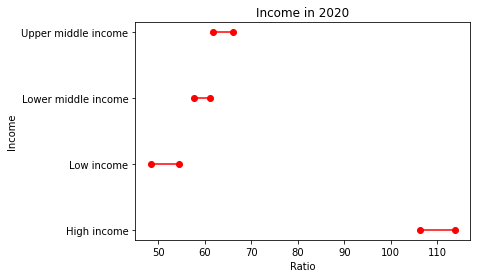

In [198]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(in20['get_ci_lb'],in20['get_ci_ub'],range(len(in20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(in20)),list(in20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income in 2020")

Text(0.5, 1.0, 'Income in 2021')

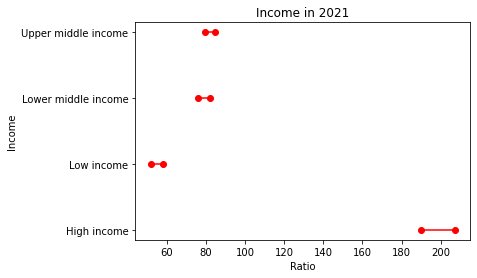

In [201]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(in21['get_ci_lb'],in21['get_ci_ub'],range(len(in21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(in21)),list(in21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income in 2021")

By comparing both graphs we can say that Low income and upper middle income showed a slight difference difference in ratio of deaths/reported cases from 2020 to 2021 yet the other income's showed no difference

# Conclusion

I analyzed the ratio between reported number of cases and deaths for both 2020 and 2021. I then compared them in terms of continent, region and income.

For region and continenet, we can say that ratio increased in most by 2021, however for income there is no major difference(increase/decrease) from 2020 to 2021

Also, ratio of deaths/reported cases decreased from 2020 to 2021